# **1. Importing necessary libraries**

In [24]:
# Import necessary libraries
print(f"Importing necessary libraries: Initiated")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Supervised Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Unsupervised Learning Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Metrics for evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_curve,
    auc,
    classification_report,
)

print(f"Importing necessary libraries: Completed")

Importing necessary libraries: Initiated
Importing necessary libraries: Completed


# **2. Dataset Description**

## 1.1 Dataset loading

In [2]:
print("Dataset loading started.....")

def loadGoogleDriveDataset(fileID):
    url = f'https://drive.google.com/uc?export=download&id={fileID}'
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        csvData = StringIO(response.text)
        df = pd.read_csv(csvData)
        print("Dataset loaded successfully.")
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")
        print("Please check if the Google Drive link is correct or not, and sharing is set to 'Anyone with the link'.")
        return None

googleDriveFileID = '1VQ3ww4sMHWxJvVtV2RA0Y025VPguSN9T'
df = loadGoogleDriveDataset(googleDriveFileID)

# check if data loading failed
if df is None:
    exit()

Dataset loading started.....
Dataset loaded successfully.


In [3]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1.2 Dataset description

1.2.0 Dataset description

In [6]:
#FeatureCount
print(f"🔴 How many features? How many data points?")
print(f"The dataset has {df.shape[0]} data points (rows).")
print(f"The dataset has {df.shape[1]} features (cols).")
print(f"The dataset has {df.size} data-entries (rows x cols).")
print("")

#ClassificationORRegression
print(f"🔴 Classification or regression problem? ")
print(f"This is a binary-classification problem.")
print(f"Reason: The goal is to predict a binary outcome - whether a booking is canceled (1) or not (0).")
print()

# What kind of features are in your dataset?
print(f"🔴 What kind of features are in your dataset? ")
categoricalFeatures = df.select_dtypes(include=['object']).columns.tolist()
quantitativeFeatures = df.select_dtypes(include=np.number).columns.tolist()
print(f"Categorical features (inital): {categoricalFeatures}")
print(f"Quantitative features (initial): {quantitativeFeatures}")
print()

print(f"🔴 Do you need to encode the categorical variables?")
print("Categorical variables need to be encoded into a numerical format for machine learning algorithms to process them effectively.")
print()

🔴 How many features? How many data points?
The dataset has 119390 data points (rows).
The dataset has 32 features (cols).
The dataset has 3820480 data-entries (rows x cols).

🔴 Classification or regression problem? 
This is a binary-classification problem.
Reason: The goal is to predict a binary outcome - whether a booking is canceled (1) or not (0).

🔴 What kind of features are in your dataset? 
Categorical features (inital): ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Quantitative features (initial): ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_i

1.2.1 Dataset visualization

In [7]:
print(f"Transposed stats for numerical features")
numericalFeatures = df.select_dtypes(include=np.number)
numericalFeatures.describe().T

Transposed stats for numerical features


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
print(f"Transposed stats for categorical features")
categoricalFeatures = df.select_dtypes(include=['object'])
categoricalFeatures.describe().T

Transposed stats for categorical features


,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


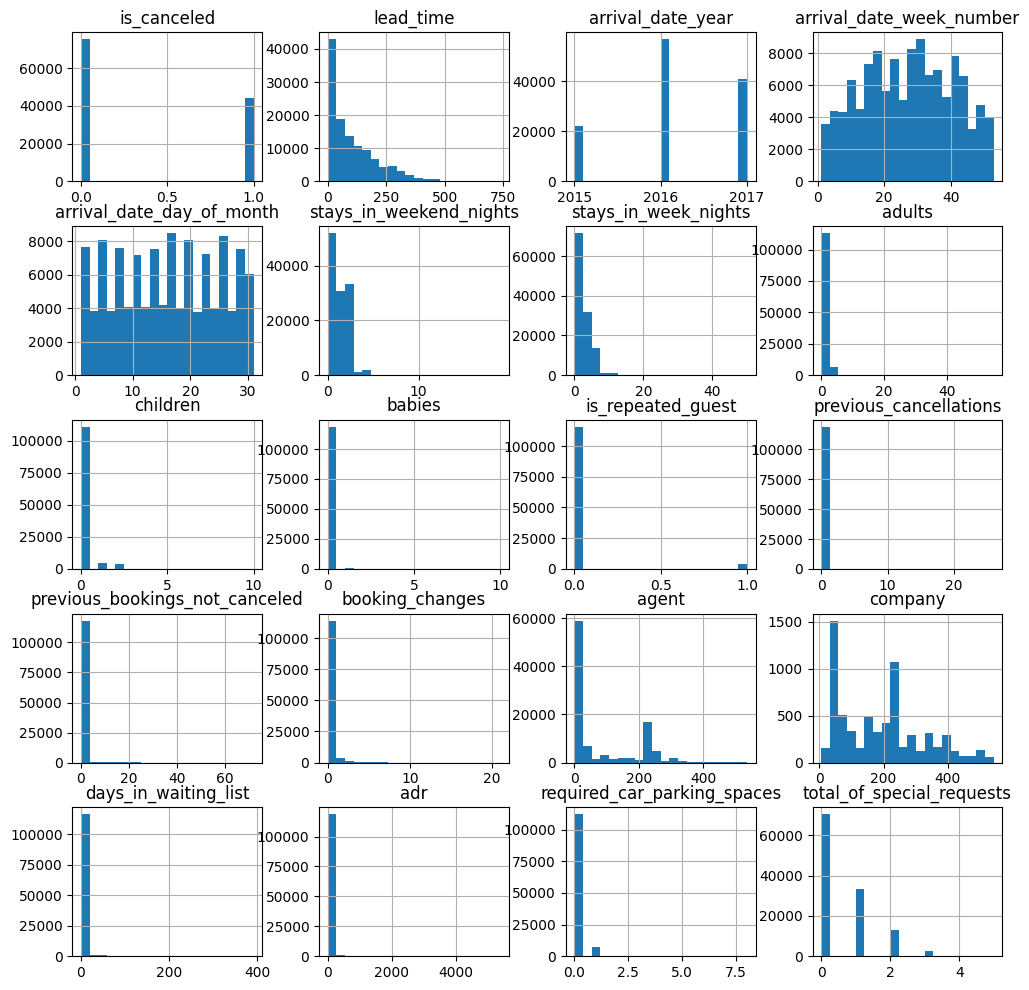

In [9]:
numericalFeatures.hist(figsize=(12,12),bins=20)
plt.show()

1.2.2 Correlation Matrix

Generating correlation heatmap for all numerical features...


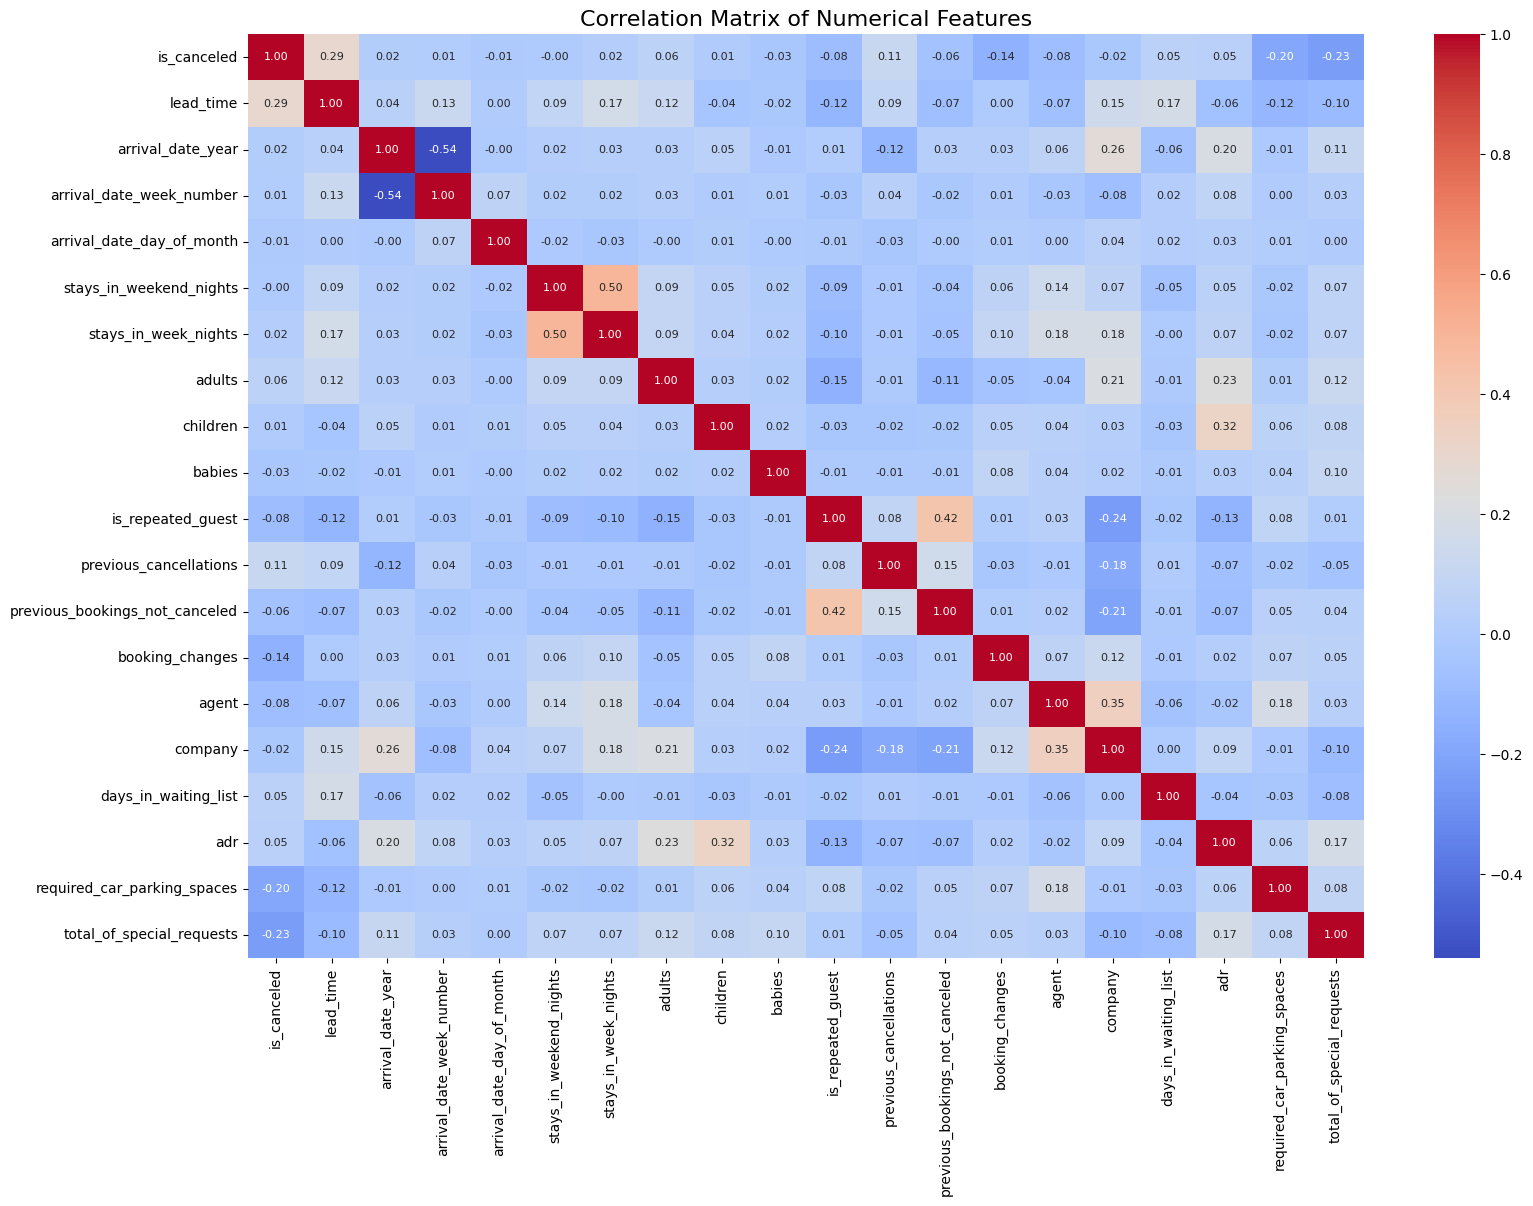

In [10]:
print("Generating correlation heatmap for all numerical features...")
plt.figure(figsize=(18, 12))

numericFeatures = df.select_dtypes(include=np.number)
corMatrix = numericFeatures.corr()
sns.heatmap(corMatrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [11]:
print("🔴 After observing the heatmap, 'is_canceled' shows notable correlations with 'lead_time', 'previous_cancellations', 'adr', and 'total_of_special_requests'.")

🔴 After observing the heatmap, 'is_canceled' shows notable correlations with 'lead_time', 'previous_cancellations', 'adr', and 'total_of_special_requests'.


## 1.3 Imbalance Dataset Checking

In [17]:
#ImbalancedCheck
print("Checking for imbalanced dataset...")
print()
count = df['is_canceled'].value_counts()
percentage = df['is_canceled'].value_counts(normalize=True) * 100
classDistribution = pd.DataFrame({'count': count, 'percentage': percentage})
print(classDistribution)

Checking for imbalanced dataset...

             count  percentage
is_canceled                   
0            75166   62.958372
1            44224   37.041628


/tmp/ipython-input-2228624471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='viridis')


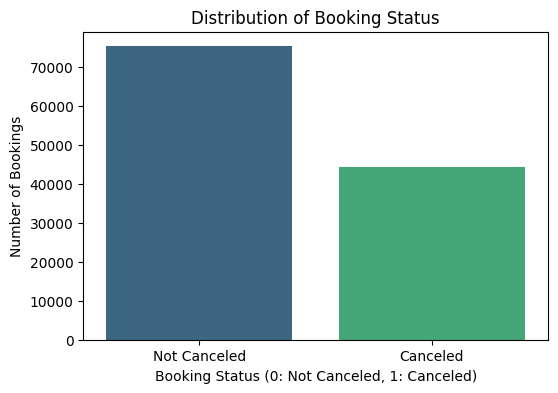


🔴 The bar chart shows an imbalance; there are more non-canceled bookings than canceled ones.


In [18]:
# Represent using a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df, palette='viridis')
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

print()
print("🔴 The bar chart shows an imbalance; there are more non-canceled bookings than canceled ones.")

# **3. Dataset Pre-processing**

## 3.1 Faults: Null / Missing values

In [21]:
print("Handling missing values...")
print()

print(f"Dropping columns:")
# print(df.columns)
print(f"The company column has a very high percentage of missing values. It's better to drop it.")
df.drop('company', axis=1, inplace=True)
# Data Leakage
print("Dropping columns ('reservation_status', 'reservation_status_date') that would cause data leakage...")
df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)
# Fault: Invalid Data
# Some bookings have 0 adults, 0 children, and 0 babies, which are invalid.
print("Removing invalid rows (0 total guests)...")
df.drop(df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)].index, inplace=True)


print()
print("Filling Missing Values:")
print(f"For 'agent', NULL likely means no agent was involved. We can fill with 0 as a placeholder.")
df['agent'].fillna(0, inplace=True)
print(f"For 'country', the number of missing values is small. We'll fill with the mode (most frequent value).")
df['country'].fillna(df['country'].mode()[0], inplace=True)
print(f"For 'children', we'll fill the few missing values with the median (0).")
df['children'].fillna(df['children'].median(), inplace=True)


Handling missing values...

Dropping columns:
The company column has a very high percentage of missing values. It's better to drop it.
Dropping columns ('reservation_status', 'reservation_status_date') that would cause data leakage...
Removing invalid rows (0 total guests)...

Filling Missing Values:
For 'agent', NULL likely means no agent was involved. We can fill with 0 as a placeholder.
For 'country', the number of missing values is small. We'll fill with the mode (most frequent value).
For 'children', we'll fill the few missing values with the median (0).


/tmp/ipython-input-2194525849.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)
/tmp/ipython-input-2194525849.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

## 3.2 Feature Scaling

In [20]:
# Define features (X) and target (y)
x = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Identify final categorical and numerical features for the modeling pipeline
categoricalFeatures = x.select_dtypes(include=['object']).columns
numericalFeatures = x.select_dtypes(include=np.number).columns
print(f"Preprocessing complete. Features have been cleaned and selected for modeling.")

Preprocessing complete. Features have been cleaned and selected for modeling.


In [23]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,C,0,No Deposit,0.0,0,Transient,107.0,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,D,0,No Deposit,15.0,0,Transient,105.5,0,0


# **4. Dataset Splitting**

In [73]:
# We will use an 80% train and 20% test split.
xTrain, xTest, yTrain, yTest = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Dataset split into training set ({len(xTrain)} rows) and testing set ({len(xTest)} rows) using stratification.")


# Pipeline for numerical features: Scale them using StandardScaler.
numericalTransformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical features: One-hot encode them.
categoricalTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', categories=[xTrain[col].unique() for col in categoricalFeatures]))
])

# Create a master preprocessor object using ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numericalTransformer, numericalFeatures),
        ('cat', categoricalTransformer, categoricalFeatures)
    ],
    remainder='passthrough'
)

Dataset split into training set (95368 rows) and testing set (23842 rows) using stratification.


# **5. Model Training & Testing (Supervised)**

In [74]:
# Define the models as required by the instructions (Neural Network + at least 2 others)
# We will use 5 common and effective models for a thorough comparison.
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=10),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(max_iter=500, random_state=42, hidden_layer_sizes=(100, 50), activation='relu', solver='adam', early_stopping=True)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(xTrain, yTrain)

    # Make predictions
    yPred = pipeline.predict(xTest)

    # For ROC curve, we need probability scores
    if hasattr(pipeline, "predict_proba"):
        yPredProb = pipeline.predict_proba(xTest)[:, 1]
    else: # For models like SVC without probability=True
        yPredProb = pipeline.decision_function(xTest)


    # Evaluate the model
    accuracy = accuracy_score(yTest, yPred)
    precision = precision_score(yTest, yPred)
    recall = recall_score(yTest, yPred)
    cm = confusion_matrix(yTest, yPred)
    fpr, tpr, _ = roc_curve(yTest, yPredProb)
    roc_auc = auc(fpr, tpr)

    # Store results, including the trained pipeline for later use
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'cm': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'pipeline': pipeline  # Store the entire trained pipeline
    }
    print(f"{name} training and evaluation complete.")


Training Logistic Regression...
Logistic Regression training and evaluation complete.

Training Decision Tree...
Decision Tree training and evaluation complete.

Training K-Nearest Neighbors...
K-Nearest Neighbors training and evaluation complete.

Training Neural Network (MLP)...
Neural Network (MLP) training and evaluation complete.


# **6. Model Comparison analysis**

## 6.1 Model Prediction Accuracy Comparison

/tmp/ipython-input-1849899296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='magma')


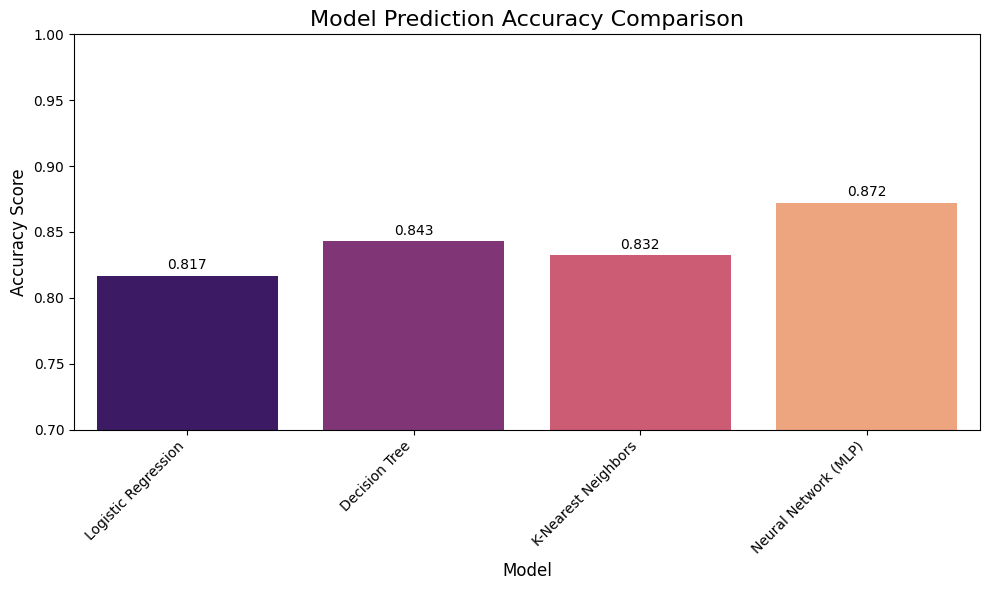


--- Precision, Recall, and Accuracy of All Models ---
                      Accuracy  Precision  Recall
Logistic Regression     0.8167     0.8052  0.6669
Decision Tree           0.8430     0.8171  0.7429
K-Nearest Neighbors     0.8321     0.7798  0.7626
Neural Network (MLP)    0.8721     0.8456  0.8014


In [75]:
# Bar chart showcasing prediction accuracy
accuracies = {name: res['accuracy'] for name, res in results.items()}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='magma')
plt.title('Model Prediction Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 1.0)
for index, value in enumerate(list(accuracies.values())):
    plt.text(index, value + 0.005, f'{value:.3f}', ha='center')
plt.tight_layout()
plt.show()

# Precision and Recall comparison
print("\n--- Precision, Recall, and Accuracy of All Models ---")
metrics_df = pd.DataFrame({
    'Accuracy': {name: res['accuracy'] for name, res in results.items()},
    'Precision': {name: res['precision'] for name, res in results.items()},
    'Recall': {name: res['recall'] for name, res in results.items()}
})
print(metrics_df.round(4))

## 6.2 Confusion Matrices for Each Model

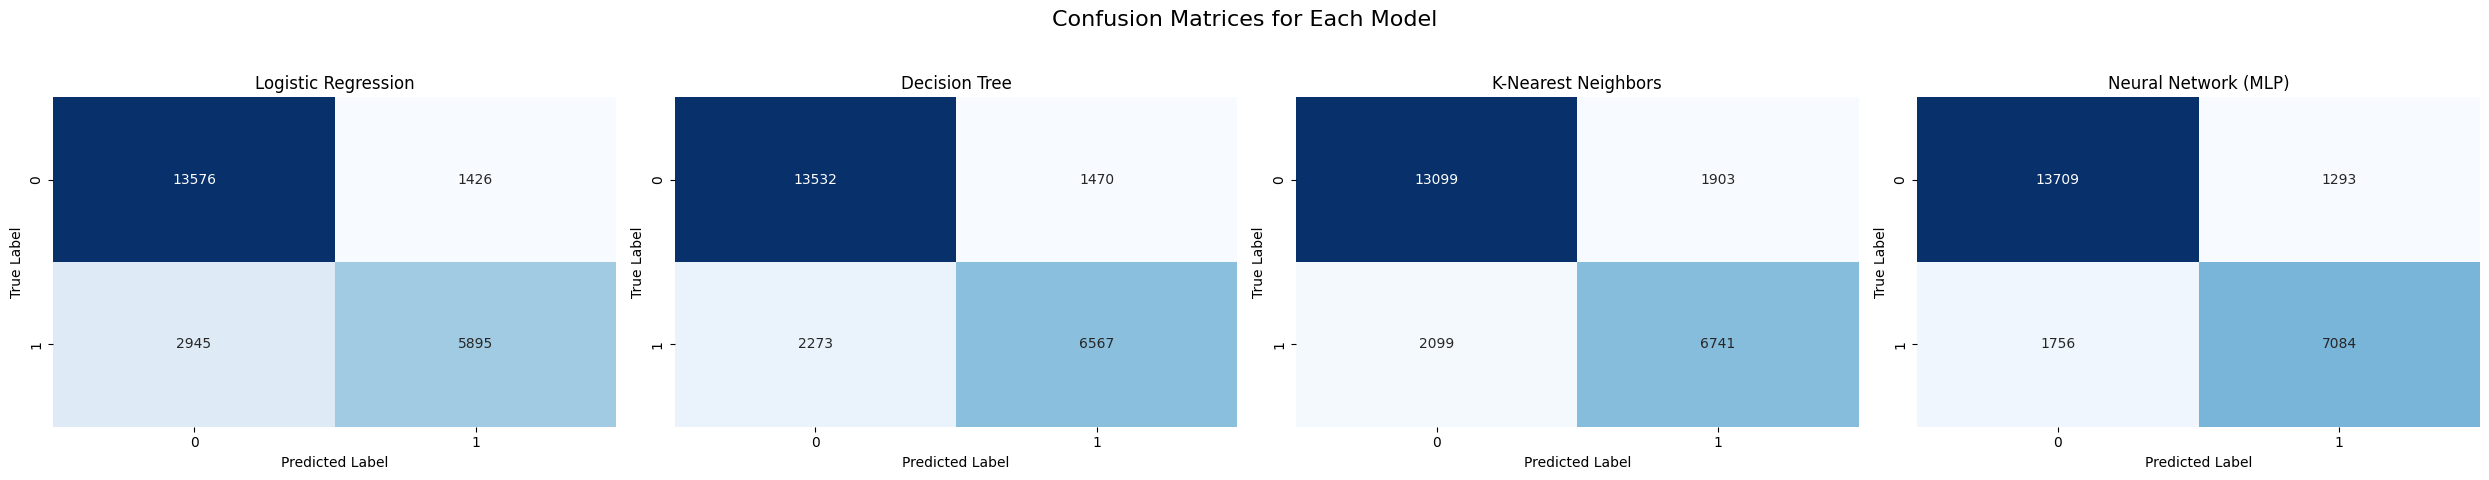

In [76]:
# Confusion Matrix for each model
fig, axes = plt.subplots(1, len(models), figsize=(25, 5))
fig.suptitle('Confusion Matrices for Each Model', fontsize=16)
for i, (name, res) in enumerate(results.items()):
    sns.heatmap(res['cm'], annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 6.3 ROC Curve Comparison for All Models

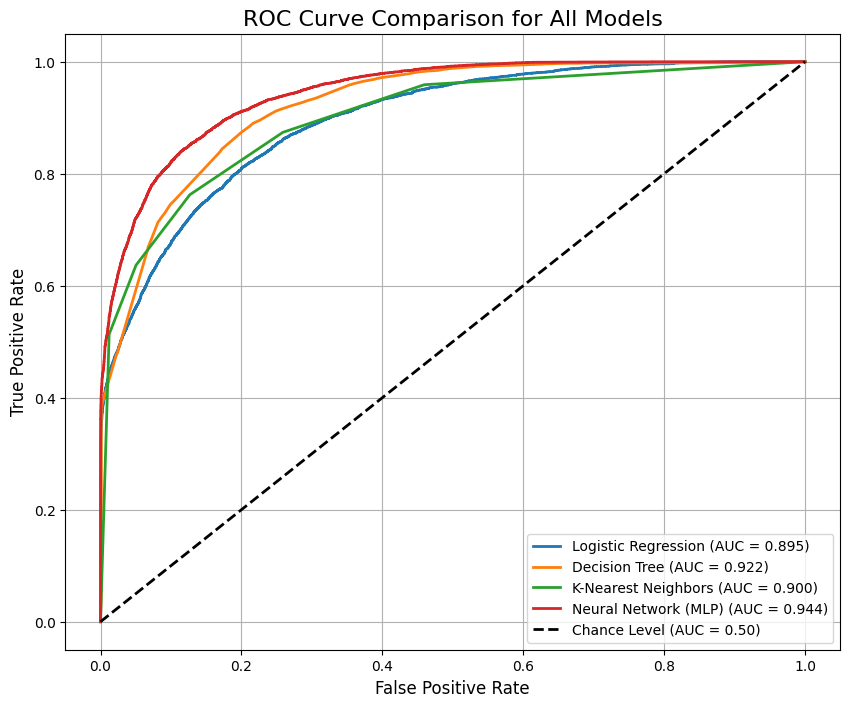

In [77]:
# ROC Curve for each model on one plot
plt.figure(figsize=(10, 8))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], lw=2, label=f"{name} (AUC = {res['roc_auc']:.3f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance Level (AUC = 0.50)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison for All Models', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()


## 6.4 K-Means Clusters (Visualized with PCA)

Preprocessing data for K-Means...
Applying K-Means with k=2...
K-Means clustering complete.
Visualizing clusters using PCA...


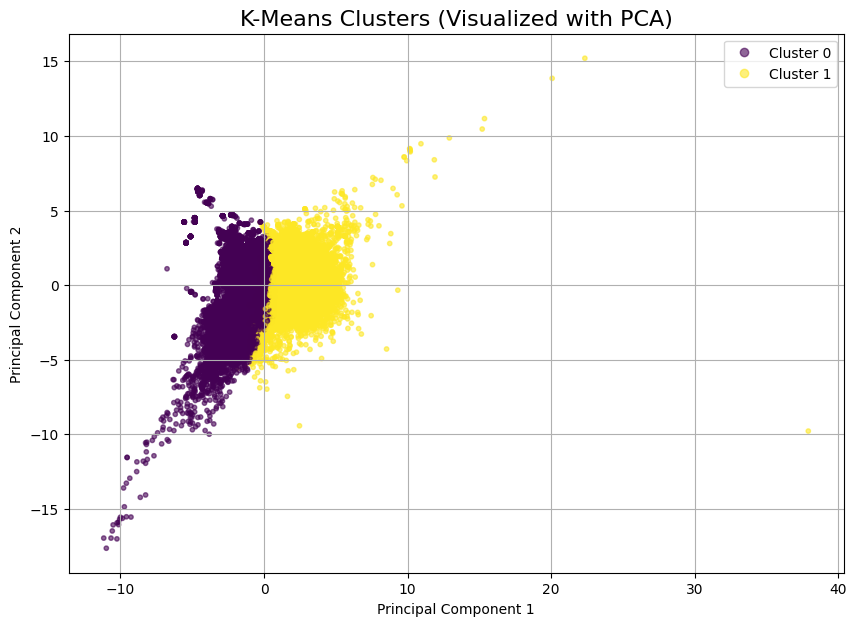

In [78]:
print("Preprocessing data for K-Means...")
preProcessedXFull = preprocessor.fit_transform(x)

print("Applying K-Means with k=2...")
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(preProcessedXFull)

print("K-Means clustering complete.")
print("Visualizing clusters using PCA...")
pca = PCA(n_components=2)
xPCA = pca.fit_transform(preProcessedXFull.toarray())

plt.figure(figsize=(10, 7))
scatter = plt.scatter(xPCA[:, 0], xPCA[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=10)
plt.title('K-Means Clusters (Visualized with PCA)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1'])
plt.grid(True)
plt.show()

# **7. Testing a new booking**

In [79]:
bestModel = max(accuracies, key=accuracies.get)
bestPipeline = results[bestModel]['pipeline']
bestClassifier = bestPipeline.named_steps['classifier']
fittedPreprocessor = bestPipeline.named_steps['preprocessor']
print(f"The best performing model is '{bestModel}' with an accuracy of {accuracies[bestModel]:.3f}.")
print()

# Create a new booking
newBooking = {
    'hotel': 'City Hotel',
    'lead_time': 5,
    'arrival_date_year': 2024,
    'arrival_date_month': 'December',
    'arrival_date_week_number': 50,
    'arrival_date_day_of_month': 10,
    'stays_in_weekend_nights': 0,
    'stays_in_week_nights': 1,
    'adults': 1,
    'children': 0,
    'babies': 0,
    'meal': 'SC',
    'country': 'USA',
    'market_segment': 'Direct',
    'distribution_channel': 'Direct',
    'is_repeated_guest': 1,
    'previous_cancellations': 0,
    'previous_bookings_not_canceled': 5,
    'reserved_room_type': 'A',
    'assigned_room_type': 'A',
    'booking_changes': 1,
    'deposit_type': 'No Deposit',
    'agent': 0.0,
    'days_in_waiting_list': 0,
    'customer_type': 'Contract',
    'adr': 90.0,
    'required_car_parking_spaces': 1,
    'total_of_special_requests': 2
}

dfNew = pd.DataFrame([newBooking])
preprocessedNew = fittedPreprocessor.transform(dfNew)
predictionNew = bestClassifier.predict(preprocessedNew)
if hasattr(bestClassifier, "predict_proba"):
    predProbNew = bestClassifier.predict_proba(preprocessedNew)
else:
    predProbNew = None
    print("Note: Classifier does not support predict_proba.")


print(f"New Booking Details:\n{dfNew.T.to_string(header=False)}")


print("\nModel Prediction:")
if predictionNew[0] == 1:
    print("  -> Status: This booking is LIKELY TO BE CANCELED.")
else:
    print("  -> Status: This booking is LIKELY TO BE KEPT (NOT CANCELED).")

if predProbNew is not None:
    print("\nPrediction Probabilities:")
    print(f"  - Probability of NOT being canceled (Class 0): {predProbNew[0][0]:.2%}")
    print(f"  - Probability of BEING canceled (Class 1):    {predProbNew[0][1]:.2%}")


print("\nTesting finished.")

The best performing model is 'Neural Network (MLP)' with an accuracy of 0.872.

New Booking Details:
hotel                           City Hotel
lead_time                                5
arrival_date_year                     2024
arrival_date_month                December
arrival_date_week_number                50
arrival_date_day_of_month               10
stays_in_weekend_nights                  0
stays_in_week_nights                     1
adults                                   1
children                                 0
babies                                   0
meal                                    SC
country                                USA
market_segment                      Direct
distribution_channel                Direct
is_repeated_guest                        1
previous_cancellations                   0
previous_bookings_not_canceled           5
reserved_room_type                       A
assigned_room_type                       A
booking_changes                        